I am currently completing the part 1 of the fast.ai deep learning course. Based on the lesson on image classification, I decided to apply what I learned directly on a Kaggle Dataset. The dataset I chose was the Flower Species dataset. The dataset consists of 5 types of flowers:

1. daisy
2. dandelion
3. rose
4. sunflower
5. tulip

My main goal through this article is to demonstrate how various pre-trained models - taught during the lecture(to classify dog breeds) - perform on a completely different dataset and how the prediction accuracy can be improved by following the steps in the lecture. 

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

/home/kaju/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kaju/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kaju/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
torch.cuda.set_device(0)
PATH = "data/kaggle_data/flowers/"

Before we start training, we will be visualizing the folder structure of the Kaggle dataset and look into the type of data that we will be training on.

In [4]:
os.listdir(PATH)

['valid', 'tmp', 'train', 'models']

In [5]:
os.listdir(f'{PATH}valid')

['sunflower', 'dandelion', 'daisy', 'rose', 'tulip']

In [6]:
files = os.listdir(f'{PATH}valid/daisy')[:5]
files

['34693373736_9ce6d9e1c3_n.jpg',
 '33839388103_79cb79f7bc_n.jpg',
 '34540113401_b81594e92a_n.jpg',
 '34520690871_8fe693bc71_n.jpg',
 '19544831049_0d738d4872_m.jpg']

In [7]:
img = plt.imread(f'{PATH}valid/daisy/{files[0]}')

Next we will directly plot the image using imshow() function of matplotlib library

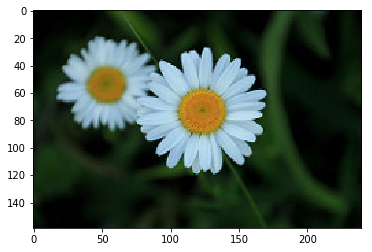

In [8]:
plt.imshow(img)

In [9]:
img.shape

(159, 240, 3)

Next we choose the batch size - denoted by bs and the size of the mini batch - denoted by sz. Jeremy recommends we limit batch size to 64 to prevent out gpus from running out of memory. Here after experimenting with both the numbers a little bit I decided to use the following values(as shown in the code block)

While calling fit, the first parameter we have to specify is the learning rate and the second parameter is the number of epochs the learning algorithm should run. 

In [10]:
sz = 180 #160 # 100
bs = 60 #48 # 58

arch = resnet34
data = ImageClassifierData.from_paths(PATH,tfms=tfms_from_model(arch,sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01,2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.742515   0.390907   0.855886  
    1      0.55134    0.328543   0.882288                  



[array([0.32854]), 0.8822882289540256]

So from the above results we can see that we achieved a 90% accuracy where validation loss is 0.3 and training loss is 0.5. When validation loss is greater than training loss, it means that the model is <b>underfitting</b> the data.

Next we want to visualize the actual output values that correspond with the different types of flowers in the dataset.
Here an output of 0 represents a 'Daisy', 1 represents a 'Dandelion', 2 represents a 'Rose', 3 represents a 'Sunflower' and 4 represents 'Tulip'

In [11]:
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 

In [12]:
data.classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [13]:
log_preds = learn.predict()

In [14]:
log_preds.shape

(909, 5)

I used the following visualization code directly from the dog breed classification notebook. The purpose of the following code snippets are to help us in visualizing the individual prediction results for each flower type. 

In [15]:
preds = np.argmax(log_preds, axis=1)

In [16]:
probs = np.exp(log_preds[:,1])

In [17]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [18]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [19]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

In [20]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

We saw above that the output value of tulip is 4, so we search for the most correctly classified Tulip and pass '4' as the parameter for the most_by_correct() function.

Most correct tulips


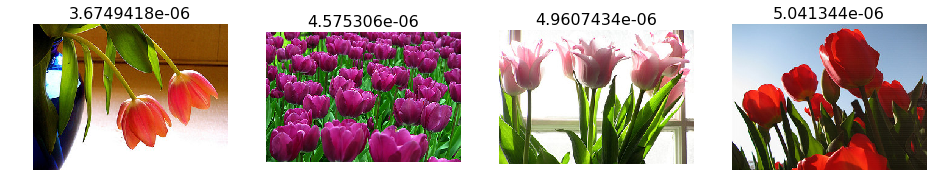

In [21]:
plot_val_with_title(most_by_correct(4, True), "Most correct tulips")

We do a similar thing for dandelions and pass '1' to the most_by_correct() function.

Most correct dandelion


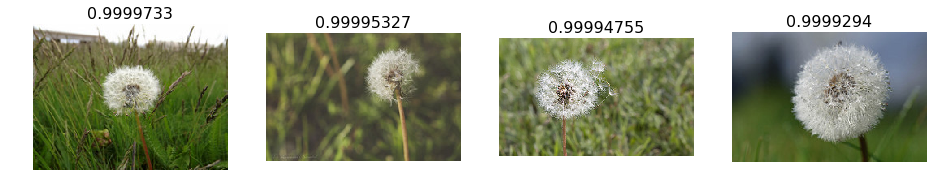

In [22]:
plot_val_with_title(most_by_correct(1, True), "Most correct dandelion")

Most correct daisy


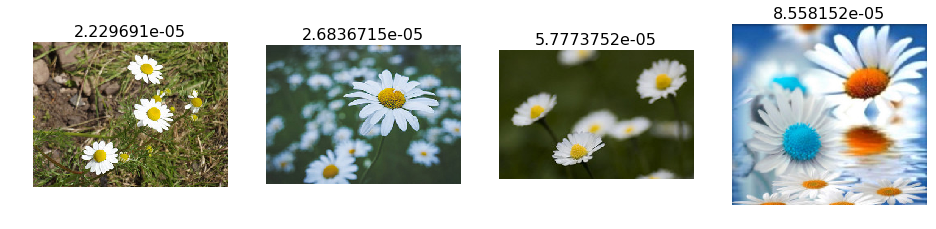

In [23]:
plot_val_with_title(most_by_correct(0, True), "Most correct daisy")

Most incorrect dandalion


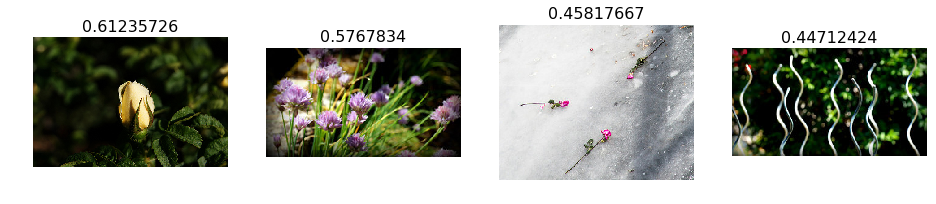

In [24]:
plot_val_with_title(most_by_correct(2, False), "Most incorrect dandalion")

In [25]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]

Here we plot out some results for which the algorithm gave out most uncertain results.

Most uncertain daisy


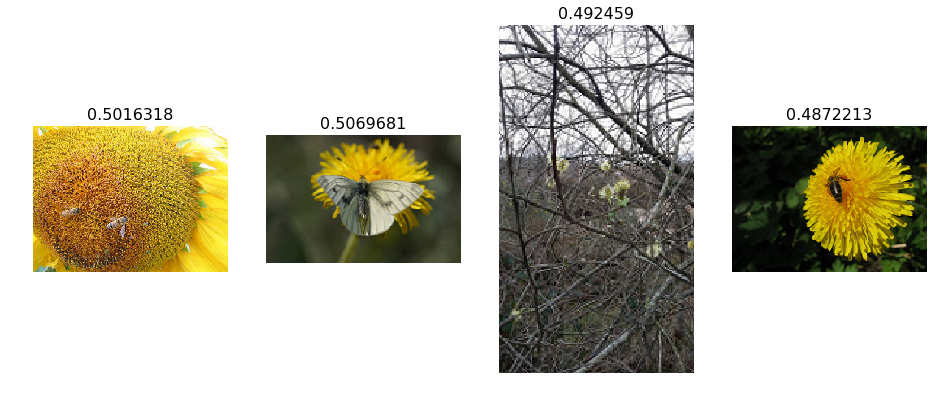

In [26]:
plot_val_with_title(most_uncertain, "Most uncertain daisy")

In the following part we will try to improve our results, first by tweaking the learning rate. One of the great techniques taught in the lesson by Jeremy is how to use the learning rate finder to find an optimal learning rate.

In [27]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
lrf = learn.lr_find()

 52%|█████▏    | 28/54 [00:00<00:00, 51.67it/s, loss=1.9] 


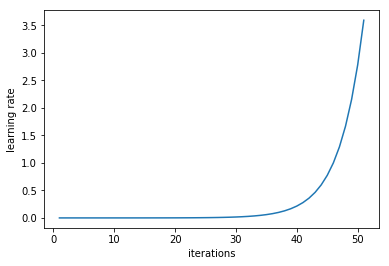

In [28]:
learn.sched.plot_lr()

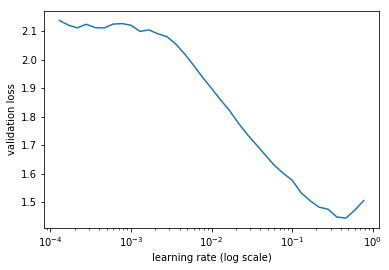

In [29]:
learn.sched.plot()

In the above graph we can see that the learning rate improves the validation loss quite a lot and the loss starts to deteriorate once it reaches around 10^0

Here we use an augmentation to increase the number of images the model is trained on to improve the results and because some images contain other objects apart from the flowers, we increase the zoom so that the main object i.e the flowers are focused on

In [30]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.2)

In [31]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [32]:
learn.fit(1e-2,1)

epoch      trn_loss   val_loss   accuracy                 
    0      0.770752   0.415666   0.856986  



[array([0.41567]), 0.856985698569857]

After a bit of experimentation we select max zoom as 1.2. Here we see that the accuracy of our model is now 85%. The next technique we will use to improve the model accuracy is setting precompute to false so that we train more than just the last layer. 

In [33]:
learn.precompute=False

In [34]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.546182   0.380415   0.861386  
    1      0.502242   0.353638   0.872387                  
    2      0.472065   0.329294   0.872387                  



[array([0.32929]), 0.8723872387238724]

Here we are adding one extra parameter to our learn.fit function and that is cycle_len. When we set precompute to false, the learning rate is decreased over time through an epoch. It helps to improve the accuracy. Now using the cycle_len parameter we set the learning back to the original value at the start of each epoch. This method is known as Stochastic Gradient Descent with Restarts. From my understanding this method is similar to Simulated Annealing with random restarts, where we slowly reduce the temperature and when the learning stops improving we change the start point. 

The main thing to notice here is that the difference between the training and validation loss is reduced. Next we save our weights.

In [35]:
learn.save('my_flowers_model')

In [36]:
learn.load('my_flowers_model')

In [37]:
lrf = learn.lr_find()

 93%|█████████▎| 50/54 [00:13<00:01,  3.66it/s, loss=1.05] 

Here we will do the final step of optimization by unfreezing all layers for training our model. We will also use a differential learning rates for the various layers, using a very low learning rate for the initial layers ensures that we do not change the model too much and reduce randomness in our training. For the last layer we will use 0.01. 

We also introduce an additional parameter cycle_mult which will multiply the restart cycle by 2, i.e. we will not be resetting our learning rate after every cycle. 

In [38]:
learn.unfreeze()

In [39]:
lr=np.array([1e-4,1e-3,1e-2])

Here we set the epoch to 4 and keep cycle_mult = 2.

In [40]:
learn.fit(lr,4, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.4876     0.351446   0.881188  
    1      0.407921   0.245844   0.915292                  
    2      0.331398   0.227943   0.915292                  
    3      0.296284   0.172596   0.949395                  
    4      0.236564   0.137267   0.954895                  
    5      0.201938   0.129488   0.959296                  
    6      0.177395   0.125692   0.960396                  
    7      0.175748   0.102724   0.973597                  
    8      0.168544   0.083811   0.975798                  
    9      0.130336   0.074389   0.977998                  
    10     0.114602   0.067763   0.984598                  
    11     0.101305   0.057105   0.986799                   
    12     0.09126    0.055736   0.983498                   
    13     0.086521   0.056217   0.985699                   
    14     0.078594   0.05461    0.983498                   


[array([0.05461]), 0.9834983498349835]

So with our current set of parameters we were able to achieve <b>98% accuracy!!!!</b>. Considering our initial accuracy of 90% just out of the box, this is huge improvement!

In our final step we will use TTA or test time augmentation to apply the various augmentation techniques we selected in order to improve our final accuracy

In [41]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [42]:
accuracy_np(probs, y)

0.988998899889989

In [43]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

Following this we plot our confusion matrix which helps us in identifying correct and wrong predictions

[[156   1   0   1   0]
 [  0 241   0   0   0]
 [  0   0 149   0   3]
 [  0   0   0 154   0]
 [  1   0   3   1 199]]


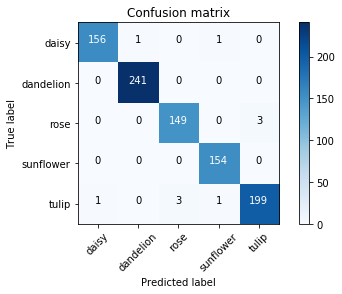

In [45]:
plot_confusion_matrix(cm, data.classes)

Architecture comparison
Here we will compare the performance of 4 major architectures, straight out of the box without any of the improvement techniques from above to get a sense about their performance differences. The architectures we are considering are 

1. VGG16
2. VGG19
3. Resnet34
4. Resnet50

In [46]:
arch1 = vgg16
arch2 = vgg19
arch3 = resnet34
arch4 = resnet50

In [47]:
tfms1 = tfms_from_model(arch1, sz, aug_tfms=transforms_side_on, max_zoom=1.2)
tfms2 = tfms_from_model(arch2, sz, aug_tfms=transforms_side_on, max_zoom=1.2)
tfms3 = tfms_from_model(arch3, sz, aug_tfms=transforms_side_on, max_zoom=1.2)
tfms4 = tfms_from_model(arch4, sz, aug_tfms=transforms_side_on, max_zoom=1.2)

In [48]:
data1 = ImageClassifierData.from_paths(PATH, tfms=tfms1)
data2 = ImageClassifierData.from_paths(PATH, tfms=tfms2)
data3 = ImageClassifierData.from_paths(PATH, tfms=tfms3)
data4 = ImageClassifierData.from_paths(PATH, tfms=tfms4)

In [49]:
learn1 = ConvLearner.pretrained(arch1, data1, precompute=True)
learn2 = ConvLearner.pretrained(arch2, data2, precompute=True)
learn3 = ConvLearner.pretrained(arch3, data3, precompute=True)
learn4 = ConvLearner.pretrained(arch4, data4, precompute=True)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /home/kaju/.torch/models/vgg16_bn-6c64b313.pth
100%|██████████| 553507836/553507836 [02:30<00:00, 3688371.58it/s]


100%|██████████| 15/15 [00:14<00:00,  1.04it/s]


Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /home/kaju/.torch/models/vgg19_bn-c79401a0.pth
100%|██████████| 574769405/574769405 [02:36<00:00, 3675073.04it/s]


100%|██████████| 15/15 [00:14<00:00,  1.06it/s]


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/kaju/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:26<00:00, 3926556.29it/s]


100%|██████████| 15/15 [00:05<00:00,  2.92it/s]


In [50]:
learn1.fit(1e-2,1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.852339   0.441764   0.858086  


[array([0.44176]), 0.858085808580858]

In [51]:
learn2.fit(1e-2,1)

epoch      trn_loss   val_loss   accuracy                 
    0      0.868403   0.449992   0.854785  


[array([0.44999]), 0.8547854786134265]

In [52]:
learn3.fit(1e-2,1)

epoch      trn_loss   val_loss   accuracy                 
    0      0.769037   0.379166   0.877888  


[array([0.37917]), 0.8778877887788779]

In [53]:
learn4.fit(1e-2,1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.577648   0.291827   0.908691  


[array([0.29183]), 0.9086908690869087]